# OASIS INFOBYTE TASK 3

# CAR PRICE PREDICTION MODEL JANUARY 23

Predicting the price of a car based on certain features like the brand of the car, horsepower and mileage.

In [1]:
#Prepared by; Seghosime Joshua
#Email; vanjosh8@gmail.com
#phone; +2347032803248

In [2]:
#importimg the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [3]:
#loading the dataset
train = pd.read_csv(r"C:\Users\HP\Desktop\Data Science\Cars_d\train-data.csv")
test = pd.read_csv(r'C:\Users\HP\Desktop\Data Science\Cars_d\test-data.csv')

In [4]:
train.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [5]:
#checking the total number of rows and columns
train.shape

(6019, 14)

In [6]:
#To see the unique values of price
print(train['Price'].unique())

[ 1.75 12.5   4.5  ...  2.27 17.56  7.43]


In [7]:
#checking test dataset
test.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [8]:
#checking the number of rows and column
test.shape

(1234, 13)

**Data Cleaning**

In [9]:
#before we perform the statistical summary of the datasets let merge the train and test datasets together
df = train.append(test)

In [10]:
df.shape

(7253, 14)

In [11]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [12]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 1233
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 850.0+ KB


In [13]:
#removing the column unnamed
df = df.iloc[:,1:]
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [14]:
#checking general statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.0,2014.00,2016.00,2019.0
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.0,53416.00,73000.00,6500000.0
Seats,7200.0,5.279722,0.811660,0.00,5.0,5.00,5.00,10.0
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.0


In [15]:
#printing the total columns
df.columns.tolist()

['Name',
 'Location',
 'Year',
 'Kilometers_Driven',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'New_Price',
 'Price']

In [16]:
#Looking at the unique values of Categorical Features
print(df['Location'].unique())
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner_Type'].unique())

['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
['Manual' 'Automatic']
['First' 'Second' 'Fourth & Above' 'Third']


In [17]:
#checking for duplicates
df.duplicated().sum()

1

In [18]:
#drop the duplicate
df.drop_duplicates(inplace=True)

In [19]:
#rechecking to see if it was dropped
df.duplicated().sum()

0

In [20]:
#checking datatypes
df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [21]:
#checking for null values
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6246
Price                1233
dtype: int64

In [22]:
#replacing the missing or null values using simple imputer
from sklearn.impute import SimpleImputer

null_col = ['Mileage', 'Engine' , 'Power','Seats', 'Seats', 'New_Price', 'Price']

imputer = SimpleImputer(strategy='most_frequent')
df[null_col] = imputer.fit_transform(df[null_col])

In [23]:
#rechecking for null values
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

In [24]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,33.36 Lakh,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,33.36 Lakh,12.5
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.5
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,33.36 Lakh,6.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,33.36 Lakh,17.74


In [25]:
#we dont need the new price column so let's drop it
df = df.drop('New_Price', axis=1)

In [26]:
#checking to see if it was dropped
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.5
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.5
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [27]:
#convert datatypes
df = df.convert_dtypes()

In [28]:
df.sample(9)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1126,Honda City i DTec VX,Coimbatore,2018,45555,Diesel,Manual,First,26.0 kmpl,1498 CC,98.6 bhp,5,11.73
3505,Fiat Punto EVO 1.2 Emotion,Hyderabad,2010,59270,Petrol,Manual,First,15.7 kmpl,1172 CC,67 bhp,5,2.6
3728,Toyota Fortuner 4x2 AT,Delhi,2014,79000,Diesel,Automatic,First,12.55 kmpl,2982 CC,168.5 bhp,7,18.25
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5,4.5
5541,Chevrolet Beat Diesel LT,Chennai,2012,81000,Diesel,Manual,First,25.44 kmpl,936 CC,56.3 bhp,5,2.5
5168,Maruti Wagon R LXI,Jaipur,2007,71000,Petrol,Manual,Second,18.9 kmpl,998 CC,67.1 bhp,5,1.5
1156,Volkswagen Polo 1.2 MPI Highline,Bangalore,2014,62000,Petrol,Manual,First,16.47 kmpl,1198 CC,74 bhp,5,5.35
5027,Audi A4 2.0 TDI 177 Bhp Technology Edition,Bangalore,2014,29000,Diesel,Automatic,First,17.11 kmpl,1968 CC,174.33 bhp,5,26.0
5382,Land Rover Range Rover 2.2L Prestige,Delhi,2015,37000,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5,36.0


**Feature Engineering**

In [29]:
#declaring variable for spliting power column because of the unit attached to it
cols = ['Power', 'Engine', 'Mileage']

In [30]:
df[df['Power'] == 'null bhp']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.8 kmpl,1399 CC,null bhp,5,2.0
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0 kmpl,1086 CC,null bhp,5,1.3
89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.0 kmpl,1086 CC,null bhp,5,2.1
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0 kmpl,1086 CC,null bhp,5,0.85
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.0 kmpl,1086 CC,null bhp,5,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...
872,Toyota Etios GD,Kolkata,2013,60000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5,4.5
877,Toyota Etios Liva GD,Hyderabad,2013,86000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5,4.5
928,Toyota Etios Liva G,Delhi,2012,77800,Petrol,Manual,First,18.3 kmpl,1197 CC,null bhp,5,4.5
1073,Hyundai Santro Xing XG AT eRLX Euro III,Coimbatore,2007,64168,Petrol,Automatic,First,17.0 kmpl,1086 CC,null bhp,5,4.5


In [31]:
indx = df[df['Power'] == 'null bhp'].index

In [32]:
df.drop(indx,axis=0,inplace=True)

In [33]:
for col in cols:
    df[col] = df[col].apply(lambda x : float(x.split()[0]))

In [34]:
df.sample(8)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1924,BMW 5 Series 2013-2017 530d M Sport,Coimbatore,2017,27313,Diesel,Automatic,First,14.69,2993.0,258.00,5,48.63
3539,Nissan Terrano XL D Option,Hyderabad,2013,65280,Diesel,Manual,First,19.87,1461.0,83.14,5,5.8
330,Volkswagen Jetta 2007-2011 1.6 Trendline,Mumbai,2010,92000,Petrol,Manual,Second,14.00,1595.0,102.00,5,4.5
2015,Maruti Swift VDI BSIV,Coimbatore,2014,44282,Diesel,Manual,First,25.20,1248.0,74.00,5,5.99
1436,Ford Figo Diesel ZXI,Chennai,2010,90000,Diesel,Manual,First,20.00,1399.0,68.00,5,2.6
2516,Maruti SX4 Green Vxi (CNG),Mumbai,2014,53000,CNG,Manual,First,22.10,1586.0,85.70,5,3.26
941,Mercedes-Benz SLC 43 AMG,Coimbatore,2018,18338,Petrol,Automatic,First,19.00,2996.0,362.07,2,4.5
1658,Hyundai Verna 1.6 SX VTVT (O),Coimbatore,2015,52191,Petrol,Manual,First,17.10,1591.0,121.30,5,7.78


In [35]:
#we need to split the column 'name' into brand and name of car
df["Brand"] = df.Name.apply(lambda x:x.split()[0])

In [36]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5,12.5,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5,4.5,Honda
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5,17.74,Audi
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.10,814.0,55.20,5,2.35,Hyundai


In [37]:
#so lets drop the name column now because we dont need it any more, since we have extracted the car brand
df.drop("Name",axis=1,inplace=True)

In [38]:
#also drop the year we dont need it
df.drop("Year",axis=1,inplace=True)

In [39]:
#check the dataset again
df.head(10)

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Mumbai,72000,CNG,Manual,First,26.60,998.0,58.16,5,1.75,Maruti
1,Pune,41000,Diesel,Manual,First,19.67,1582.0,126.20,5,12.5,Hyundai
2,Chennai,46000,Petrol,Manual,First,18.20,1199.0,88.70,5,4.5,Honda
4,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5,17.74,Audi
5,Hyderabad,75000,LPG,Manual,First,21.10,814.0,55.20,5,2.35,Hyundai
6,Jaipur,86999,Diesel,Manual,First,23.08,1461.0,63.10,5,3.5,Nissan
7,Mumbai,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8,17.5,Toyota
8,Pune,64430,Diesel,Manual,First,20.54,1598.0,103.60,5,5.2,Volkswagen
9,Chennai,65932,Diesel,Manual,Second,22.30,1248.0,74.00,5,1.95,Tata
10,Kochi,25692,Petrol,Manual,First,21.56,1462.0,103.25,5,9.95,Maruti


In [40]:
#check all car brands
print(df['Brand'].unique())

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley' 'Lamborghini'
 'OpelCorsa']


**Exploratory Data Analysis**

In [41]:
#declaring the numeric columns
Num_cols = ["Kilometers_Driven","Mileage","Engine","Power","Seats","Price"]

**Univariate Analysis**

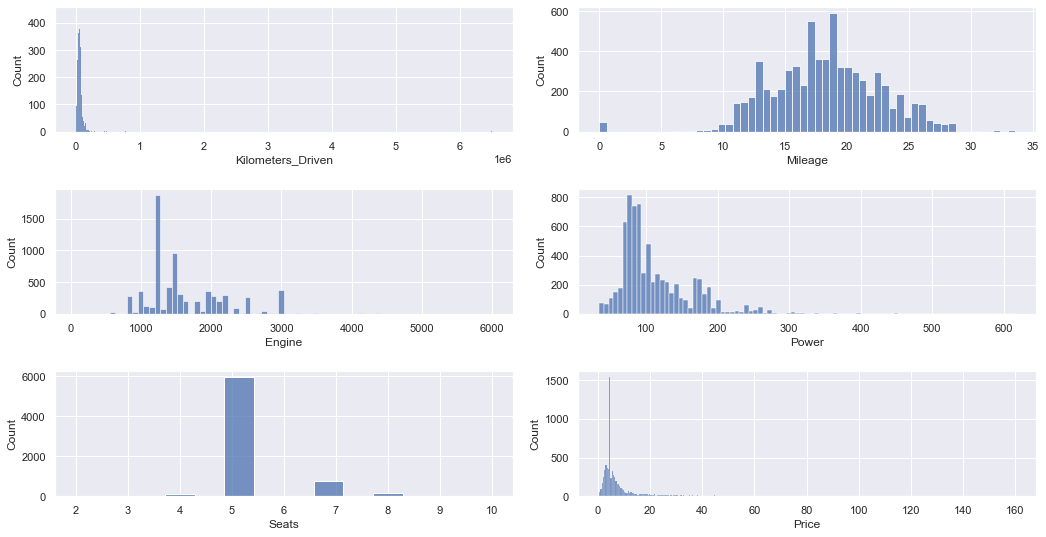

In [42]:
plt.figure(figsize=(15,10))
for index,i in enumerate(Num_cols):
    plt.tight_layout(pad=2,h_pad=2)
    plt.subplot(4,2,index+1)
    sns.histplot(df[i])

*Most of the cars have a mileage of 13-23,the engines are around 1000-1500cc and the power of the cars ranges from around 800-1000bhp.*

<AxesSubplot:>

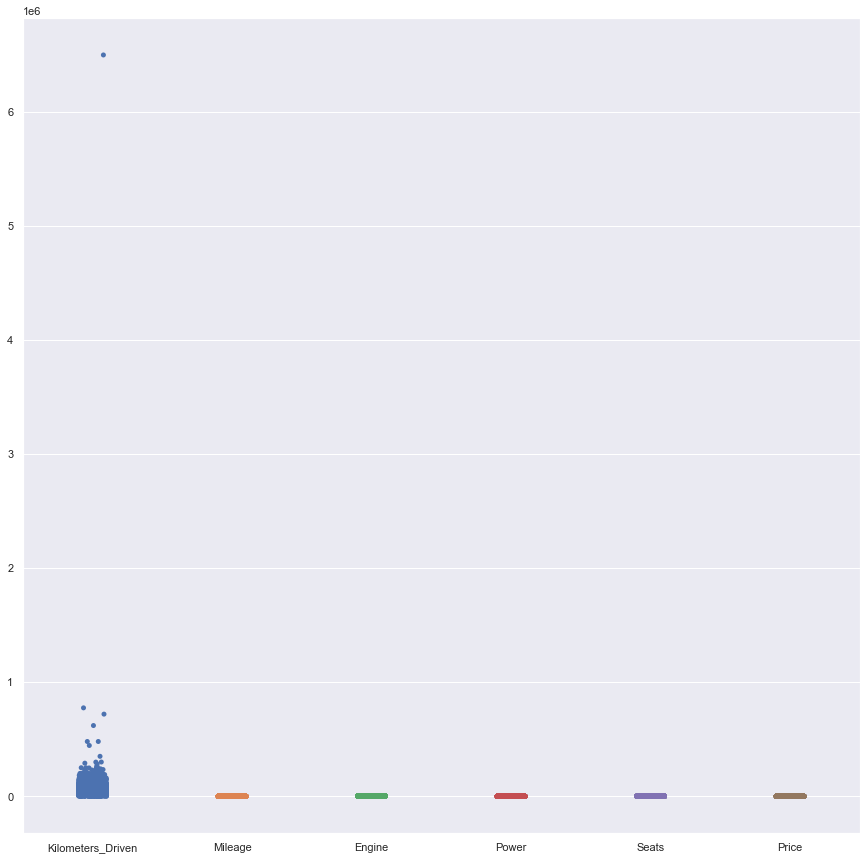

In [43]:
plt.figure(figsize=(15,15))
sns.stripplot(data=df)

*Clearly all the fetures are skewed to the right direction, also indicating a high level of outliers or values.*

**Bi-variate Analysis**

*In this session we are checking the relationship between our dependent feature 'Price' against other features*

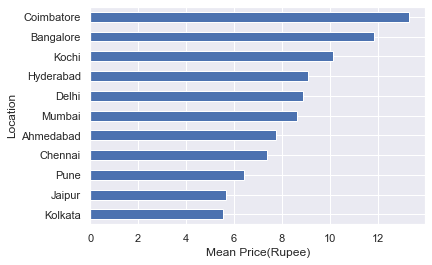

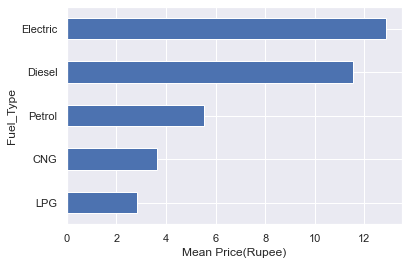

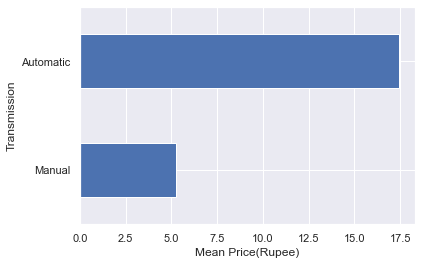

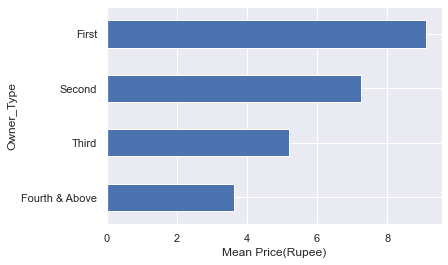

In [44]:
for i in df.select_dtypes(exclude=np.number).columns[:-1]:
    plt.figure()
    df.groupby(i)["Price"].mean().sort_values(ascending = True).plot(kind="barh")
    plt.xlabel("Mean Price(Rupee)")

*Clearly, cars from Coimbatore, Bangalore and Kochi have the highest average price, while electric cars have a high average price, but invariably the average price of automatic cars is close to 20 rupee compared to 5 rupee for manual.*

Text(0.5, 0, 'Median Price(rupee)')

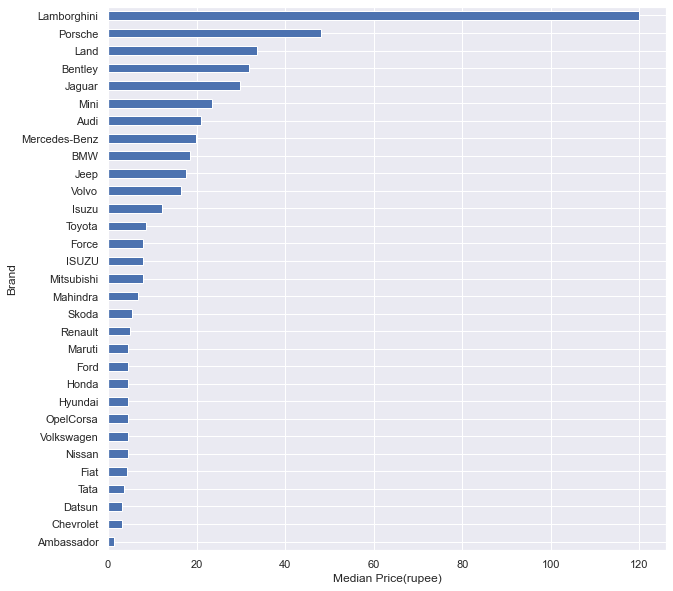

In [45]:
plt.figure(figsize=(10,10))
df.groupby("Brand")["Price"].median().sort_values(ascending = True).plot(kind="barh")
plt.xlabel("Median Price(rupee)")

*Analytically, premium and luxury cars such as lamborgini, porsche, land and bently have the highest averrage prices, but other brands such as Honda, Maruti, Hyundai, Ford , Chevrolet have median prices of around 5 lakhs or less, which is affordable for medium income class people.*

Text(0.5, 0, 'Median Price(rupee)')

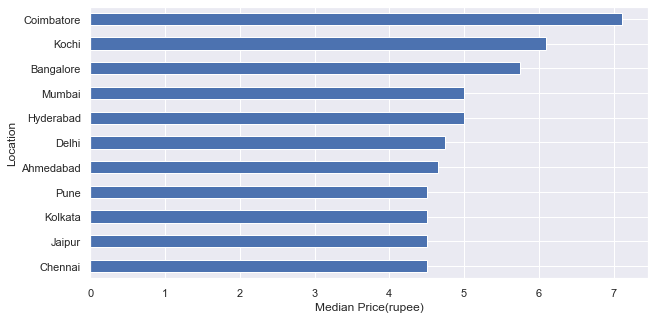

In [46]:
plt.figure(figsize=(10,5))
df.groupby("Location")["Price"].median().sort_values(ascending = True).plot(kind="barh")
plt.xlabel("Median Price(rupee)")

**Multivariate Analysis**

<AxesSubplot:>

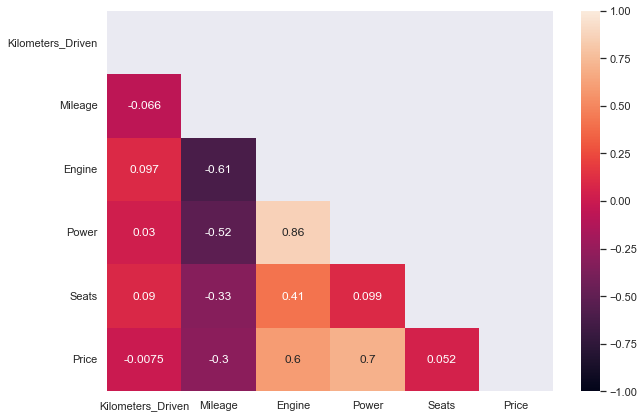

In [47]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,vmin = -1 , vmax=1,mask=np.triu(np.ones(df.corr().shape)))

*With respect to price, there is a strong correation price, power and engine. indicating  that the price of cars are strongly dependent on the type of its engine and power.*

**Preprocessing**

*let's transform the categorical and numeric data*

In [48]:
#copy the old data
df1 = df.copy()

In [49]:
#let's get numeric representation for categorical feature
df.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Mumbai,72000,CNG,Manual,First,26.60,998.0,58.16,5,1.75,Maruti
1,Pune,41000,Diesel,Manual,First,19.67,1582.0,126.20,5,12.5,Hyundai
2,Chennai,46000,Petrol,Manual,First,18.20,1199.0,88.70,5,4.5,Honda
4,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5,17.74,Audi
5,Hyderabad,75000,LPG,Manual,First,21.10,814.0,55.20,5,2.35,Hyundai


***ordinal tranformation***

In [50]:
transformation = {
    "First":3,
    "Second":2,
    "Third":1,
    "Fourth & Above":0
}

In [51]:
df['Owner_Type'] = df['Owner_Type'].map(transformation)

In [53]:
pip install category_encoders

In [54]:
#importing the libraries
from sklearn.preprocessing import PowerTransformer
import category_encoders as ce

***nominal transformation***

In [56]:
Nominal_data = ['Location','Fuel_Type','Transmission','Brand']
binaryencoder = ce.BinaryEncoder(cols=Nominal_data)
df = binaryencoder.fit_transform(df)

***numerical transformation***

In [57]:
#PowerTransformer 
dff = pd.DataFrame(PowerTransformer().fit_transform(df), columns=df.columns, index=df.index)

In [58]:
#check the new df
dff.head()

,Location_0,Location_1,Location_2,Location_3,Kilometers_Driven,Fuel_Type_0,Fuel_Type_1,Fuel_Type_2,Transmission_0,Transmission_1,...,Mileage,Engine,Power,Seats,Price,Brand_0,Brand_1,Brand_2,Brand_3,Brand_4
0,-0.624047,-0.821072,-0.924140,0.867991,0.580430,-0.044528,-9.660918,1.071375,-0.633457,0.633457,...,1.983265,-1.279827,-1.478469,-0.292639,-1.779449,-0.292328,-0.60157,-0.863493,-1.105463,0.928355
1,-0.624047,-0.821072,1.082087,-1.152086,-0.293894,-0.044528,0.103510,-0.933380,-0.633457,0.633457,...,0.304588,0.141692,0.565174,-0.292639,1.020517,-0.292328,-0.60157,-0.863493,0.904599,-1.077175
2,-0.624047,-0.821072,1.082087,0.867991,-0.126284,-0.044528,0.103510,1.071375,-0.633457,0.633457,...,-0.036227,-0.698244,-0.292187,-0.292639,-0.289624,-0.292328,-0.60157,-0.863493,0.904599,0.928355
4,-0.624047,1.217919,-0.924140,-1.152086,-0.305463,-0.044528,0.103510,-0.933380,1.578639,-1.578639,...,-0.712706,0.771861,0.808957,-0.292639,1.372193,-0.292328,-0.60157,1.158087,-1.105463,-1.077175
5,-0.624047,1.217919,-0.924140,0.867991,0.649351,22.457897,-9.660918,-0.933380,-0.633457,0.633457,...,0.641581,-1.950691,-1.638534,-0.292639,-1.302459,-0.292328,-0.60157,-0.863493,0.904599,-1.077175


**Data Splitting**

In [59]:
#declare dependent and independent variable
X = dff.drop("Price",axis=1)
y = dff.Price

In [61]:
print(X.head())

   Location_0  Location_1  Location_2  Location_3  Kilometers_Driven  \
0   -0.624047   -0.821072   -0.924140    0.867991           0.580430   
1   -0.624047   -0.821072    1.082087   -1.152086          -0.293894   
2   -0.624047   -0.821072    1.082087    0.867991          -0.126284   
4   -0.624047    1.217919   -0.924140   -1.152086          -0.305463   
5   -0.624047    1.217919   -0.924140    0.867991           0.649351   

   Fuel_Type_0  Fuel_Type_1  Fuel_Type_2  Transmission_0  Transmission_1  \
0    -0.044528    -9.660918     1.071375       -0.633457        0.633457   
1    -0.044528     0.103510    -0.933380       -0.633457        0.633457   
2    -0.044528     0.103510     1.071375       -0.633457        0.633457   
4    -0.044528     0.103510    -0.933380        1.578639       -1.578639   
5    22.457897    -9.660918    -0.933380       -0.633457        0.633457   

   Owner_Type   Mileage    Engine     Power     Seats   Brand_0  Brand_1  \
0    0.462338  1.983265 -1.279827 

In [62]:
print(y.head())

0   -1.779449
1    1.020517
2   -0.289624
4    1.372193
5   -1.302459
Name: Price, dtype: float64


In [64]:
#importing the libraries
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
#there is need for standard scalling
#SC = StandardScaler()
#SC = StandardScaler().fit(X_sc[list(num_cols)])
#X_sc[list(num_cols)] = SC.transform(X_sc[list(num_cols)])

In [65]:
#splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [66]:
print(X_train.shape,y_train.shape)

(4740, 20) (4740,)


In [67]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred= rf_reg.predict(X_test)
print("Accuracy on Traing set: ",rf_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",rf_reg.score(X_test,y_test))

Accuracy on Traing set:  0.9554576676338848
Accuracy on Testing set:  0.6757108157604966


In [68]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

		Error Table
Mean Absolute Error      :  0.40773728059416275
Mean Squared  Error      :  0.32061555029754385
Root Mean Squared  Error :  0.5662292382927111
R Squared Error          :  0.6757108157604966


***Perfect model that is ready for deployement***